In [1]:
import yfinance as yf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

In [4]:
from ta.momentum import RSIIndicator, StochRSIIndicator
from ta.volatility import BollingerBands
from ta.trend import MACD

In [5]:
import optuna

In [7]:
ticker = 'BTC-USD'
data = yf.download(ticker, start='2020-01-01', end='2024-12-31', auto_adjust = 'False')

[*********************100%***********************]  1 of 1 completed


In [17]:
close_series = pd.Series(data['Close'].values.flatten(), index=data.index)
close_series

Date
2020-01-01     7200.174316
2020-01-02     6985.470215
2020-01-03     7344.884277
2020-01-04     7410.656738
2020-01-05     7411.317383
                  ...     
2024-12-26    95795.515625
2024-12-27    94164.859375
2024-12-28    95163.929688
2024-12-29    93530.226562
2024-12-30    92643.210938
Length: 1826, dtype: float64

In [15]:
for ma in [5, 10, 20, 50, 100, 200]:
    data[f'MA{ma}'] = close_series.rolling(ma).mean()

In [16]:
data[f'MA{ma}']

Date
2020-01-01             NaN
2020-01-02             NaN
2020-01-03             NaN
2020-01-04             NaN
2020-01-05             NaN
                  ...     
2024-12-26    70867.881836
2024-12-27    70991.144727
2024-12-28    71130.304219
2024-12-29    71256.749414
2024-12-30    71386.183477
Name: MA200, Length: 1826, dtype: float64

In [18]:
data['RSI'] = RSIIndicator(close=close_series, window=14).rsi()

In [23]:
stoch = StochRSIIndicator(close=close_series, window=14, smooth1=3, smooth2=3)
data['StochRSI_K'] = stoch.stochrsi_k()
data['StochRSI_D'] = stoch.stochrsi_d()

In [24]:
data

Price,Close,High,Low,Open,Volume,MA5,MA10,MA20,MA50,MA100,MA200,RSI,StochRSI_K,StochRSI_D
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,,,,,,,,
Date,,,,,,,,,,,,,,
2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,18565664997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,20802083465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,28111481032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,18444271275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,19725074095,7270.500586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-26,95795.515625,99884.570312,95137.882812,99297.695312,47054980873,96712.396875,98221.573438,99592.995313,95061.764063,80377.321250,70867.881836,46.737993,0.270957,0.206177
2024-12-27,94164.859375,97294.843750,93310.742188,95704.976562,52419934565,96524.381250,97023.999219,99305.071484,95426.964063,80702.473047,70991.144727,43.889453,0.160246,0.222689


In [25]:
macd = MACD(close=close_series)
data['MACD'] = macd.macd()
data['MACD_signal'] = macd.macd_signal()

In [26]:
data

Price,Close,High,Low,Open,Volume,MA5,MA10,MA20,MA50,MA100,MA200,RSI,StochRSI_K,StochRSI_D,MACD,MACD_signal
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,,,,,,,,,,
Date,,,,,,,,,,,,,,,,
2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,18565664997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,20802083465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,28111481032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,18444271275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,19725074095,7270.500586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-26,95795.515625,99884.570312,95137.882812,99297.695312,47054980873,96712.396875,98221.573438,99592.995313,95061.764063,80377.321250,70867.881836,46.737993,0.270957,0.206177,619.694116,1592.199723
2024-12-27,94164.859375,97294.843750,93310.742188,95704.976562,52419934565,96524.381250,97023.999219,99305.071484,95426.964063,80702.473047,70991.144727,43.889453,0.160246,0.222689,252.545647,1324.268908


In [27]:
bb = BollingerBands(close=close_series, window=20, window_dev=2)
data['BB_mid'] = bb.bollinger_mavg()
data['BB_high'] = bb.bollinger_hband()
data['BB_low'] = bb.bollinger_lband()

In [28]:
data

Price,Close,High,Low,Open,Volume,MA5,MA10,MA20,MA50,MA100,MA200,RSI,StochRSI_K,StochRSI_D,MACD,MACD_signal,BB_mid,BB_high,BB_low
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,,,,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,,
2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,18565664997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,20802083465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,28111481032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,18444271275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,19725074095,7270.500586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-26,95795.515625,99884.570312,95137.882812,99297.695312,47054980873,96712.396875,98221.573438,99592.995313,95061.764063,80377.321250,70867.881836,46.737993,0.270957,0.206177,619.694116,1592.199723,99592.995313,105995.402676,93190.587949
2024-12-27,94164.859375,97294.843750,93310.742188,95704.976562,52419934565,96524.381250,97023.999219,99305.071484,95426.964063,80702.473047,70991.144727,43.889453,0.160246,0.222689,252.545647,1324.268908,99305.071484,106126.385616,92483.757353


In [29]:
data.dropna(inplace=True)

In [32]:
data

Price,Close,High,Low,Open,Volume,MA5,MA10,MA20,MA50,MA100,MA200,RSI,StochRSI_K,StochRSI_D,MACD,MACD_signal,BB_mid,BB_high,BB_low
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,,,,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,,
2020-07-18,9159.040039,9230.983398,9100.824219,9151.183594,12252601475,9175.742188,9219.594727,9211.317480,9394.715820,8915.895137,8534.130850,45.716689,0.194245,0.245656,-38.296540,-34.040731,9211.317480,9389.681327,9032.953634
2020-07-19,9185.817383,9201.398438,9097.632812,9158.005859,12939002784,9164.262891,9210.379688,9211.065625,9384.423887,8939.098379,8544.059065,47.091899,0.241121,0.219516,-37.173502,-34.667285,9211.065625,9389.558516,9032.572734
2020-07-20,9164.231445,9214.270508,9137.509766,9187.220703,13755604146,9158.541797,9198.922070,9212.377539,9378.487344,8962.149863,8554.952871,46.078480,0.226921,0.220762,-37.591954,-35.252219,9212.377539,9389.079545,9035.675533
2020-07-21,9374.887695,9407.262695,9149.389648,9162.514648,18069581956,9207.073828,9212.376172,9219.705664,9362.639727,8986.187822,8565.102888,56.024356,0.479208,0.315750,-20.686916,-32.339158,9219.705664,9410.073303,9029.338025
2020-07-22,9525.363281,9530.518555,9319.653320,9375.080078,16532254884,9281.867969,9237.262500,9239.803320,9362.550918,9012.991079,8575.676421,61.488782,0.722355,0.476161,4.797271,-24.911873,9239.803320,9466.640102,9012.966539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-26,95795.515625,99884.570312,95137.882812,99297.695312,47054980873,96712.396875,98221.573438,99592.995313,95061.764063,80377.321250,70867.881836,46.737993,0.270957,0.206177,619.694116,1592.199723,99592.995313,105995.402676,93190.587949
2024-12-27,94164.859375,97294.843750,93310.742188,95704.976562,52419934565,96524.381250,97023.999219,99305.071484,95426.964063,80702.473047,70991.144727,43.889453,0.160246,0.222689,252.545647,1324.268908,99305.071484,106126.385616,92483.757353


In [33]:
features = ['Open', 'High', 'Low', 'Close', 'Volume'] + \
           [f'MA{ma}' for ma in [5, 10, 20, 50, 100, 200]] + \
           ['RSI', 'StochRSI_K', 'StochRSI_D', 'MACD', 'MACD_signal',
            'BB_mid', 'BB_high', 'BB_low']

In [34]:
features

['Open',
 'High',
 'Low',
 'Close',
 'Volume',
 'MA5',
 'MA10',
 'MA20',
 'MA50',
 'MA100',
 'MA200',
 'RSI',
 'StochRSI_K',
 'StochRSI_D',
 'MACD',
 'MACD_signal',
 'BB_mid',
 'BB_high',
 'BB_low']

## ML model implementation

In [35]:
X = data[features]
y = data['Close']

In [39]:
X

Price,Open,High,Low,Close,Volume,MA5,MA10,MA20,MA50,MA100,MA200,RSI,StochRSI_K,StochRSI_D,MACD,MACD_signal,BB_mid,BB_high,BB_low
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,,,,,,,,,,,,,
Date,,,,,,,,,,,,,,,,,,,
2020-07-18,9151.183594,9230.983398,9100.824219,9159.040039,12252601475,9175.742188,9219.594727,9211.317480,9394.715820,8915.895137,8534.130850,45.716689,0.194245,0.245656,-38.296540,-34.040731,9211.317480,9389.681327,9032.953634
2020-07-19,9158.005859,9201.398438,9097.632812,9185.817383,12939002784,9164.262891,9210.379688,9211.065625,9384.423887,8939.098379,8544.059065,47.091899,0.241121,0.219516,-37.173502,-34.667285,9211.065625,9389.558516,9032.572734
2020-07-20,9187.220703,9214.270508,9137.509766,9164.231445,13755604146,9158.541797,9198.922070,9212.377539,9378.487344,8962.149863,8554.952871,46.078480,0.226921,0.220762,-37.591954,-35.252219,9212.377539,9389.079545,9035.675533
2020-07-21,9162.514648,9407.262695,9149.389648,9374.887695,18069581956,9207.073828,9212.376172,9219.705664,9362.639727,8986.187822,8565.102888,56.024356,0.479208,0.315750,-20.686916,-32.339158,9219.705664,9410.073303,9029.338025
2020-07-22,9375.080078,9530.518555,9319.653320,9525.363281,16532254884,9281.867969,9237.262500,9239.803320,9362.550918,9012.991079,8575.676421,61.488782,0.722355,0.476161,4.797271,-24.911873,9239.803320,9466.640102,9012.966539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-26,99297.695312,99884.570312,95137.882812,95795.515625,47054980873,96712.396875,98221.573438,99592.995313,95061.764063,80377.321250,70867.881836,46.737993,0.270957,0.206177,619.694116,1592.199723,99592.995313,105995.402676,93190.587949
2024-12-27,95704.976562,97294.843750,93310.742188,94164.859375,52419934565,96524.381250,97023.999219,99305.071484,95426.964063,80702.473047,70991.144727,43.889453,0.160246,0.222689,252.545647,1324.268908,99305.071484,106126.385616,92483.757353


In [37]:
y

Ticker,BTC-USD
Date,
2020-07-18,9159.040039
2020-07-19,9185.817383
2020-07-20,9164.231445
2020-07-21,9374.887695
2020-07-22,9525.363281
...,...
2024-12-26,95795.515625
2024-12-27,94164.859375
2024-12-28,95163.929688


In [40]:
split = int(len(data) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [60]:
# Optuna Optimization
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 500, 3000),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'loss_function': 'RMSE',
        'verbose': 0
    }
    model = CatBoostRegressor(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=5)

[I 2025-07-13 23:34:25,817] A new study created in memory with name: no-name-cf6195a3-cd27-4945-9aec-1fdfcb6dae29
[I 2025-07-13 23:35:01,265] Trial 0 finished with value: 13123.564987293623 and parameters: {'iterations': 2984, 'learning_rate': 0.03645807829286318, 'depth': 7, 'l2_leaf_reg': 1.0610560630163912}. Best is trial 0 with value: 13123.564987293623.
[I 2025-07-13 23:35:05,486] Trial 1 finished with value: 13187.23370129016 and parameters: {'iterations': 1006, 'learning_rate': 0.01124309697144508, 'depth': 5, 'l2_leaf_reg': 1.0066429999254916}. Best is trial 0 with value: 13123.564987293623.
[I 2025-07-13 23:35:08,104] Trial 2 finished with value: 13126.331115688738 and parameters: {'iterations': 934, 'learning_rate': 0.09633743401116768, 'depth': 4, 'l2_leaf_reg': 8.319600469778088}. Best is trial 0 with value: 13123.564987293623.
[I 2025-07-13 23:36:05,526] Trial 3 finished with value: 13738.805004507292 and parameters: {'iterations': 2834, 'learning_rate': 0.0139446549791588

In [61]:
print("Best Parameters Found:")
print(study.best_params)

Best Parameters Found:
{'iterations': 2984, 'learning_rate': 0.03645807829286318, 'depth': 7, 'l2_leaf_reg': 1.0610560630163912}


In [62]:
best_params = study.best_params
best_params['loss_function'] = 'RMSE'
best_params['verbose'] = 100

In [63]:
model = CatBoostRegressor(**best_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

0:	learn: 13194.8480245	total: 19.9ms	remaining: 59.2s
100:	learn: 823.2440688	total: 1.11s	remaining: 31.7s
200:	learn: 457.6505267	total: 2.19s	remaining: 30.4s
300:	learn: 332.1461017	total: 3.27s	remaining: 29.1s
400:	learn: 258.2267080	total: 4.31s	remaining: 27.8s
500:	learn: 210.7092887	total: 5.35s	remaining: 26.5s
600:	learn: 178.3172803	total: 6.44s	remaining: 25.5s
700:	learn: 154.8052618	total: 7.53s	remaining: 24.5s
800:	learn: 135.5095441	total: 8.63s	remaining: 23.5s
900:	learn: 119.7724722	total: 9.71s	remaining: 22.5s
1000:	learn: 106.5165870	total: 10.8s	remaining: 21.4s
1100:	learn: 95.0744306	total: 11.9s	remaining: 20.4s
1200:	learn: 85.8876904	total: 13s	remaining: 19.4s
1300:	learn: 77.4306007	total: 14.1s	remaining: 18.3s
1400:	learn: 70.2975103	total: 15.2s	remaining: 17.2s
1500:	learn: 63.6654426	total: 16.3s	remaining: 16.1s
1600:	learn: 58.0569616	total: 17.3s	remaining: 15s
1700:	learn: 53.4538694	total: 18.4s	remaining: 13.9s
1800:	learn: 48.8812378	total:

In [64]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Best RMSE after optimization: {rmse:.2f}")

Best RMSE after optimization: 13123.56


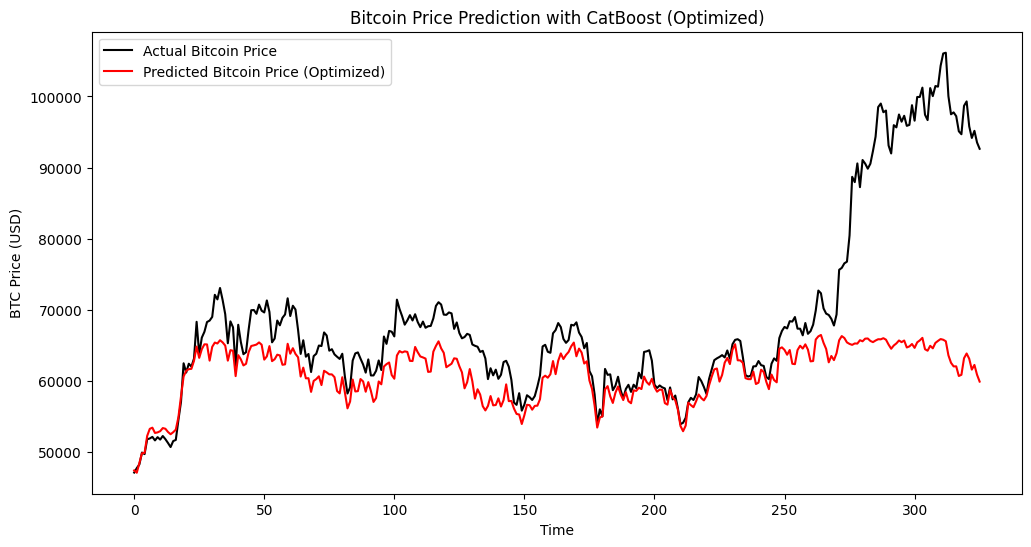

In [66]:
# Visualizations
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Bitcoin Price', color='black')
plt.plot(y_pred, label='Predicted Bitcoin Price (Optimized)', color='red')
plt.title('Bitcoin Price Prediction with CatBoost (Optimized)')
plt.xlabel('Time')
plt.ylabel('BTC Price (USD)')
plt.legend()
plt.show()